In [3]:
!pip install ipywidgets

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- --------------------------

In [3]:
#CRAWLING DATA PAKAI API
import json
import requests
import pandas as pd
from tqdm import tqdm

api_key = "2913c066d584f600dfcbe78da098835a"

with open("city.list.json", encoding='utf-8') as f:
    all_cities = json.load(f)

indonesia_cities = [c for c in all_cities if c["country"] == "ID"]

selected_cities = indonesia_cities[:400]

def get_weather_by_id(city_id):
    url = f"http://api.openweathermap.org/data/2.5/weather?id={city_id}&appid={api_key}&units=metric"
    r = requests.get(url)
    data = r.json()

    if r.status_code == 200:
        return {
            "Kota": data["name"],
            "Suhu (°C)": data["main"]["temp"],
            "Kelembapan (%)": data["main"]["humidity"],
            "Tekanan (hPa)": data["main"]["pressure"],
            "Cuaca": data["weather"][0]["main"],
            "Deskripsi": data["weather"][0]["description"],
            "Angin (m/s)": data["wind"]["speed"]
        }
    else:
        print(f" {city_id} → {data.get('message', 'Unknown error')}")
        return None

data_all = []
for city in tqdm(selected_cities):
    result = get_weather_by_id(city["id"])
    if result:
        data_all.append(result)

df = pd.DataFrame(data_all)

pd.set_option("display.max_rows", None)

df.head(230)


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:35<00:00, 11.20it/s]


,Kota,Suhu (°C),Kelembapan (%),Tekanan (hPa),Cuaca,Deskripsi,Angin (m/s)
0,Tiku,29.36,72,1011,Clouds,overcast clouds,2.15
1,Teluk Nibung,29.79,72,1011,Clouds,overcast clouds,1.20
2,Tebingtinggi,31.42,46,1010,Clouds,overcast clouds,1.51
3,Tapaktuan,29.14,70,1012,Clouds,overcast clouds,1.82
4,Tanjungtiram,30.39,62,1010,Clouds,overcast clouds,0.93
5,Tanjungbalai,29.87,72,1011,Clouds,overcast clouds,1.34
6,Sunggal,30.70,37,1008,Clouds,overcast clouds,0.95
7,North Sumatra,26.83,50,1012,Clouds,overcast clouds,2.03
8,Stabat,30.98,38,1009,Clouds,overcast clouds,0.37
9,Sondi,25.97,49,1011,Clouds,overcast clouds,2.16


In [4]:
# DATA CLEANNING
#  Cek apakah ada nilai kosong
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

df = df.dropna()

df["Suhu (°C)"] = df["Suhu (°C)"].astype(float)
df["Kelembapan (%)"] = df["Kelembapan (%)"].astype(int)
df["Tekanan (hPa)"] = df["Tekanan (hPa)"].astype(int)
df["Angin (m/s)"] = df["Angin (m/s)"].astype(float)

# Hapus duplikat (kalau ada)
df = df.drop_duplicates(subset="Kota")

# Sorting data berdasarkan suhu 
df = df.sort_values(by="Suhu (°C)", ascending=False).reset_index(drop=True)

pd.set_option("display.max_rows", None)

df.head(230)


Jumlah missing value per kolom:
Kota              0
Suhu (°C)         0
Kelembapan (%)    0
Tekanan (hPa)     0
Cuaca             0
Deskripsi         0
Angin (m/s)       0
dtype: int64


,Kota,Suhu (°C),Kelembapan (%),Tekanan (hPa),Cuaca,Deskripsi,Angin (m/s)
0,Tumbit,34.75,45,1008,Clouds,broken clouds,1.67
1,Sampit,34.06,48,1009,Clouds,broken clouds,1.42
2,Sintang,33.90,49,1009,Clouds,scattered clouds,0.57
3,Rantauprapat,33.34,49,1010,Clouds,overcast clouds,1.50
4,Pontianak,33.28,61,1010,Clouds,broken clouds,3.31
5,Toayan,33.27,52,1008,Clouds,broken clouds,2.01
6,Tengirang,33.12,50,1009,Clouds,overcast clouds,1.79
7,Puruk Cahu,33.10,49,1009,Clouds,scattered clouds,1.76
8,Sembakung,33.02,59,1008,Clouds,broken clouds,0.45
9,Samarinda,32.97,54,1008,Clouds,broken clouds,2.24


In [19]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


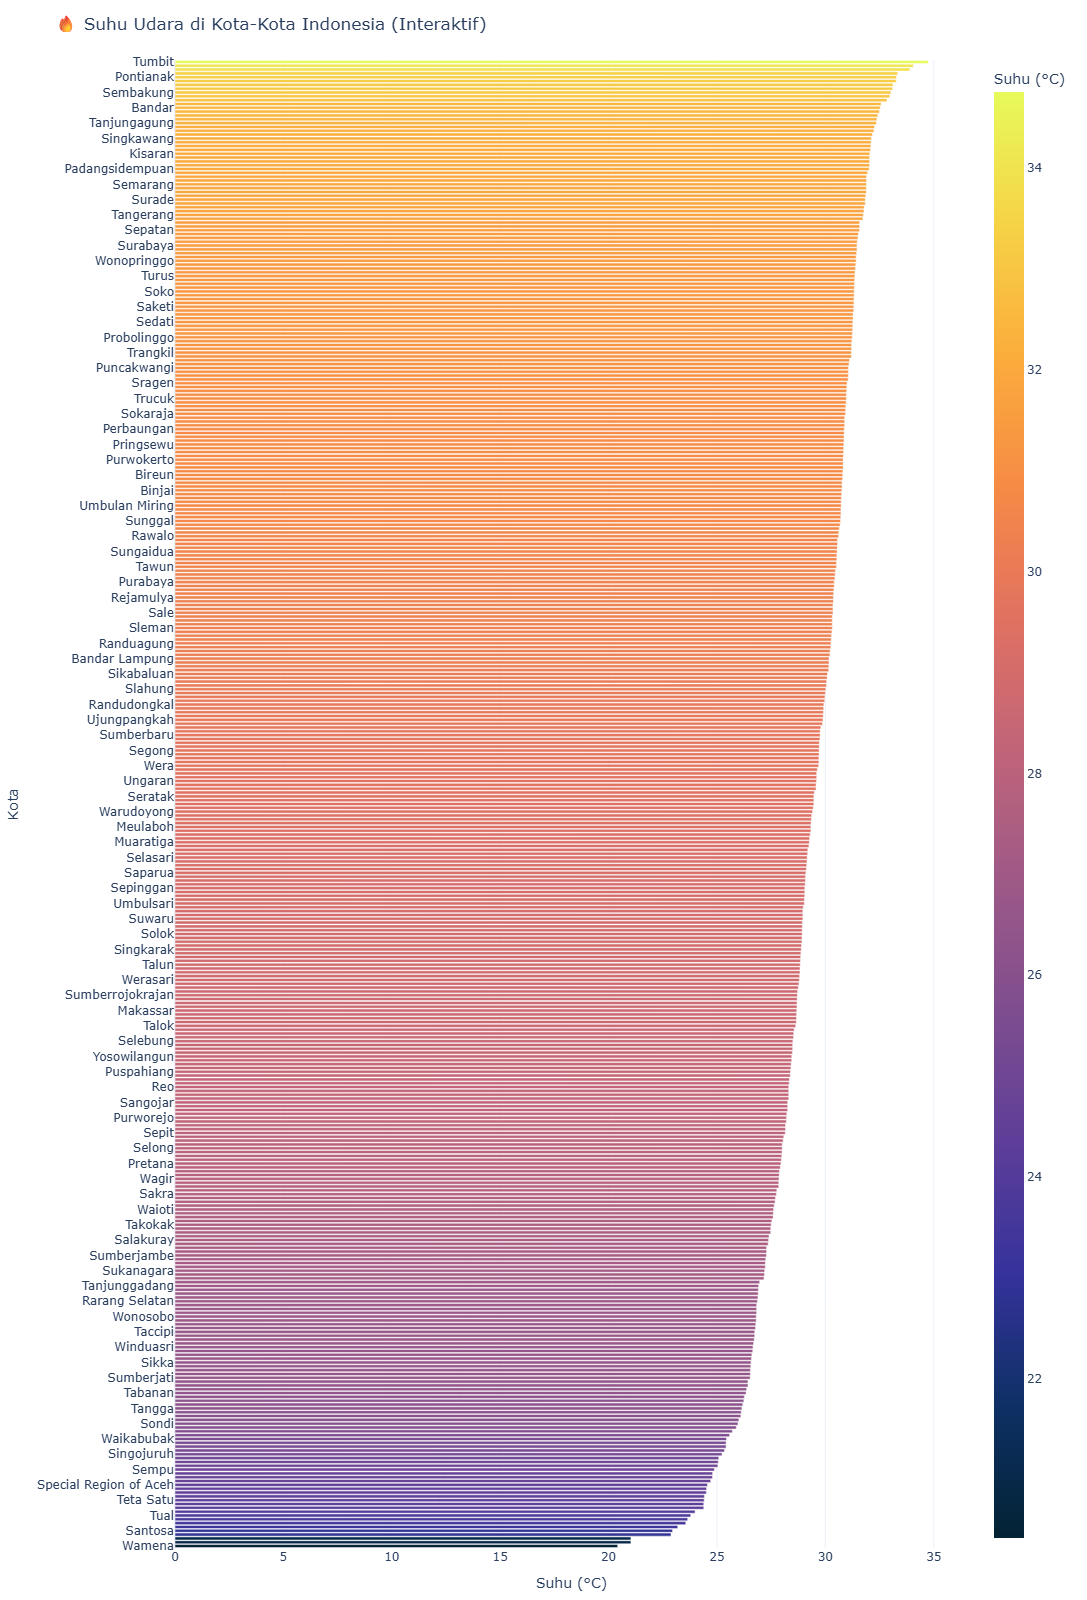

In [5]:
import plotly.express as px

# Urutkan berdasarkan suhu tertinggi
df_sorted = df.sort_values(by="Suhu (°C)", ascending=False)

# Plot
fig = px.bar(
    df_sorted,
    x="Suhu (°C)",
    y="Kota",
    orientation="h",
    title="🔥 Suhu Udara di Kota-Kota Indonesia (Interaktif)",
    color="Suhu (°C)",
    color_continuous_scale="thermal",
    height=1600  # cukup untuk 400 kota
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    margin=dict(l=100, r=40, t=60, b=30),
    template="plotly_white"
)

fig.show()


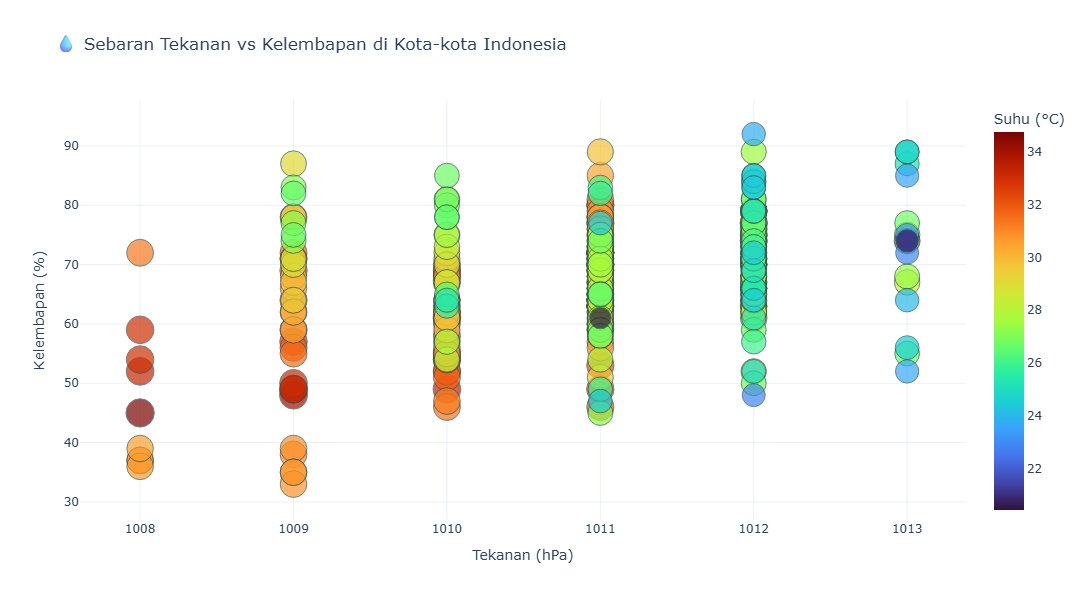

In [6]:
fig = px.scatter(
    df,
    x="Tekanan (hPa)",
    y="Kelembapan (%)",
    color="Suhu (°C)",
    hover_name="Kota",
    size="Suhu (°C)",
    title="💧 Sebaran Tekanan vs Kelembapan di Kota-kota Indonesia",
    color_continuous_scale="Turbo",
    template="plotly_white",
    height=600
)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()


In [26]:
!pip install dash --upgrade
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [30]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [7]:
import json
import requests
import pandas as pd
import time
from datetime import datetime

api_key = "2913c066d584f600dfcbe78da098835a"

with open("city.list.json", "r", encoding="utf-8") as f:
    all_cities = json.load(f)

kota_indonesia = [city for city in all_cities if city["country"] == "ID"]

selected_cities = kota_indonesia[:320]

def ambil_data_cuaca_by_id(city):
    url = f"http://api.openweathermap.org/data/2.5/weather?id={city['id']}&appid={api_key}&units=metric"
    res = requests.get(url)
    if res.status_code == 200:
        data = res.json()
        return {
            "Waktu": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            "Kota": city["name"],
            "ID Kota": city["id"],
            "Suhu (°C)": data["main"]["temp"],
            "Kelembapan (%)": data["main"]["humidity"],
            "Tekanan (hPa)": data["main"]["pressure"],
            "Cuaca": data["weather"][0]["main"],
            "Deskripsi": data["weather"][0]["description"],
            "Angin (m/s)": data["wind"]["speed"]
        }
    else:
        print(f" Error: {city['name']} → {res.json().get('message', 'Unknown error')}")
        return None

for i in range(5):
    print(f"\n Loop {i+1} — {datetime.now().strftime('%H:%M:%S')}")
    semua_data = []

    for city in selected_cities:
        cuaca = ambil_data_cuaca_by_id(city)
        if cuaca:
            semua_data.append(cuaca)
        time.sleep(0.3)  

    # Simpan ke Excel
    df = pd.DataFrame(semua_data)
    nama_file = f"cuaca_indonesia_loop_{i+1}.xlsx"
    df.to_excel(nama_file, index=False)

    print(f" Data loop-{i+1} disimpan ke {nama_file}")

    if i < 4:
        print(" Tunggu 60 detik...\n")
        time.sleep(60)

print(" Selesai! Semua data berhasil diambil dan disimpan.")



 Loop 1 — 12:31:48
 Data loop-1 disimpan ke cuaca_indonesia_loop_1.xlsx
 Tunggu 60 detik...


 Loop 2 — 12:35:02
 Data loop-2 disimpan ke cuaca_indonesia_loop_2.xlsx
 Tunggu 60 detik...


 Loop 3 — 12:38:11
 Data loop-3 disimpan ke cuaca_indonesia_loop_3.xlsx
 Tunggu 60 detik...


 Loop 4 — 12:41:11
 Data loop-4 disimpan ke cuaca_indonesia_loop_4.xlsx
 Tunggu 60 detik...


 Loop 5 — 12:44:09
 Data loop-5 disimpan ke cuaca_indonesia_loop_5.xlsx
 Selesai! Semua data berhasil diambil dan disimpan.
